# Building a Pokemon Classifier #

Train:
The train folder consists of a folder named Images which contains the images of three types of pokemon and a csv file which maps the images in the image folder to the name of that pokemon, The csv contains the field ImageId which is nothing but unique name given to each image and other field is NameOfPokemon which gives the pokemon name associated with that image.

Test:
Test also contains an image folder on which your model will be tested on and also there is a test csv file which only contains the name or ImageId of the image and gives the order in which each image is to be labelled .

In [1]:
!pip install keras
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt 

Using TensorFlow backend.


In [2]:
##path practice
from os import path

print("the current path %s" %path.curdir)
print("Absolute path %s"%path.abspath(path.curdir))
print("Absolute path %s"%path.dirname(path.curdir))

the current path .
Absolute path C:\Users\Admin\Desktop\datascience\NeuralNetwork\PokemonChallenge
Absolute path 


In [3]:
d={}
import csv
with open("train.csv") as f:
    file_data=csv.reader(f)
    
    for row in file_data:
        d[row[0]]=row[1]
d        

{'ImageId': 'NameOfPokemon',
 '296.jpg': 'Pikachu',
 '297.jpg': 'Pikachu',
 '298.jpg': 'Pikachu',
 '299.jpg': 'Pikachu',
 '300.jpg': 'Pikachu',
 '301.jpg': 'Pikachu',
 '302.jpg': 'Pikachu',
 '303.jpg': 'Pikachu',
 '304.jpg': 'Pikachu',
 '305.jpg': 'Pikachu',
 '306.jpg': 'Pikachu',
 '307.jpg': 'Pikachu',
 '308.jpg': 'Pikachu',
 '309.jpg': 'Pikachu',
 '310.jpg': 'Pikachu',
 '311.jpg': 'Pikachu',
 '312.jpg': 'Pikachu',
 '313.jpg': 'Pikachu',
 '314.jpg': 'Pikachu',
 '315.jpg': 'Pikachu',
 '316.jpg': 'Pikachu',
 '317.jpg': 'Pikachu',
 '318.jpg': 'Pikachu',
 '319.jpg': 'Pikachu',
 '320.jpg': 'Pikachu',
 '321.jpg': 'Pikachu',
 '322.jpg': 'Pikachu',
 '323.jpg': 'Pikachu',
 '324.jpg': 'Pikachu',
 '325.jpg': 'Pikachu',
 '326.jpg': 'Pikachu',
 '327.jpg': 'Pikachu',
 '328.jpg': 'Pikachu',
 '329.jpg': 'Pikachu',
 '330.jpg': 'Pikachu',
 '331.jpg': 'Pikachu',
 '332.jpg': 'Pikachu',
 '333.jpg': 'Pikachu',
 '334.jpg': 'Pikachu',
 '335.jpg': 'Pikachu',
 '336.jpg': 'Pikachu',
 '337.jpg': 'Pikachu',
 '338

In [8]:
p=Path("./Images")
print(p)
dirs=p.glob("*")

image_data=[]
labels=[]

label_dict = {"Pikachu":0,"Bulbasaur":1,"Charmander":2}
label2pokemon = {0:"Pikachu",1:"Bulbasaur",2:"Charmander"}

for img_path in dirs:
#     img1=image.load_img(img_path)
#     img1_array = image.img_to_array(img1)
#     print(img1_array.shape)
    img = image.load_img(img_path,target_size=(60,60))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    img_path=str(img_path)
    label_id=img_path.split("\\")[-1]
    labels.append(label_dict[d[label_id]])
    
print(labels) 



Images
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


## visualisation

In [9]:
import numpy as np

In [10]:
print(len(image_data))
print(len(labels))

304
304


In [11]:
import random
random.seed(10)

In [12]:
type(image_data)

list

In [13]:
X_train=np.array(image_data)
Y_train=np.array(labels)

In [14]:
from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=2)

In [15]:
X_train.shape

(304, 60, 60, 3)

In [16]:
X_train[0][0]

array([[255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [246., 173., 182.],
       [254., 215., 216.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 250., 247.],
       [255., 252., 245.],
       [251., 247., 176.],
       [251., 247., 176.],
       [251., 244., 163.],
       [254., 244., 157.],
       [240., 218., 135.],
       [255., 249., 249.],
       [255., 250., 247.],
       [250., 214., 218.],
       [251., 254., 247.],
       [234., 215., 136.],
       [250., 235., 142.],
       [248., 237., 148.],
       [250., 238., 162.],
       [251., 242., 175.],
 

#Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

In [17]:
X_train = X_train.astype('float32')
#Normalisation
X_train = X_train/255.0

In [18]:
def drawimg(img,label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.show()

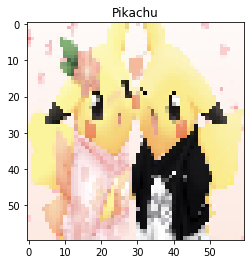

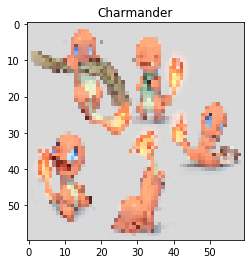

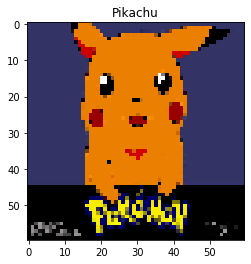

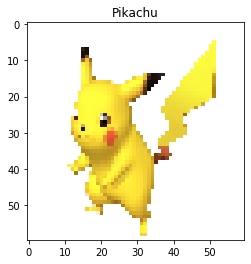

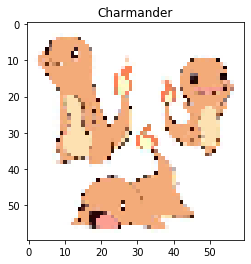

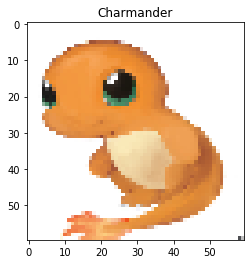

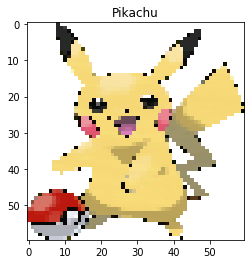

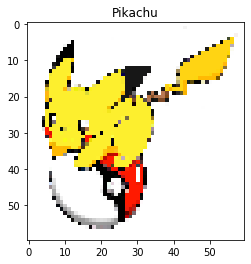

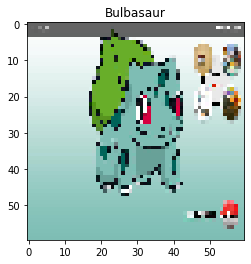

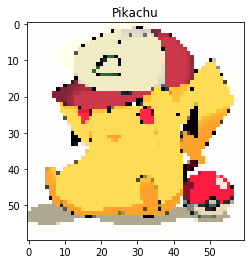

In [19]:
for i in range(10):
    drawimg(X_train[i],Y_train[i])

In [32]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [33]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [34]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 3
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
            
    
    return training_loss

In [38]:
model = NeuralNetwork(input_size=(60*60*3),layers=[100,50],output_size=3)

In [49]:
##Reshape
X_train = X_train.reshape(X_train.shape[0],-1)
print(X_train.shape)

(304, 10800)


In [50]:
l = train(X_train,Y_train,model,500,0.0002)

Epoch 0 Loss 0.0319
Epoch 50 Loss 0.0291
Epoch 100 Loss 0.0269
Epoch 150 Loss 0.0251
Epoch 200 Loss 0.0234
Epoch 250 Loss 0.0220
Epoch 300 Loss 0.0206
Epoch 350 Loss 0.0194
Epoch 400 Loss 0.0184
Epoch 450 Loss 0.0175


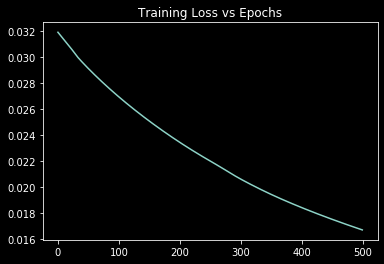

In [51]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [52]:
##get Accuracy

def getAccuracy(X,Y,model):
    output=model.predict(X)
    acc=np.sum(output==Y)/(Y.shape[0])
    
    return acc


In [53]:
print("Train Accuracy %.4f"%getAccuracy(X_train,Y_train,model))

Train Accuracy 0.9934


In [54]:
##test data
p=Path("./Images1")
print(p)
dirs=p.glob("*")

X_test=[]
Y_test=[]

for img_path in dirs:
#     img1=image.load_img(img_path)
#     img1_array = image.img_to_array(img1)
#     print(img1_array.shape)
    img = image.load_img(img_path,target_size=(60,60))
    img_array = image.img_to_array(img)
    X_test.append(img_array)
    img_path=str(img_path)
    label_id=img_path.split("\\")[-1]
    Y_test.append(label_id)
    
print(Y_test) 



Images1
['1100.jpg', '1101.jpg', '1102.jpg', '1103.jpg', '1104.jpg', '1105.jpg', '1106.jpg', '1107.jpg', '1108.jpg', '1109.jpg', '1110.jpg', '1111.jpg', '1112.jpg', '1113.jpg', '1114.jpg', '1115.jpg', '1116.jpg', '1117.jpg', '1118.jpg', '1119.jpg', '1120.jpg', '1121.jpg', '1122.jpg', '1123.jpg', '1124.jpg', '1125.jpg', '1126.jpg', '1127.jpg', '1128.jpg', '1129.jpg', '1130.jpg', '1131.jpg', '1132.jpg', '1133.jpg', '1134.jpg', '1135.jpg', '1136.jpg', '1137.jpg', '1138.jpg', '1139.jpg', '1140.jpg', '2000.jpg', '2001.jpg', '2002.jpg', '2003.jpg', '2004.jpg', '2005.jpg', '2006.jpg', '2007.jpg', '2008.jpg', '2009.jpg', '2010.jpg', '2011.jpg', '2012.jpg', '2013.jpg', '2014.jpg', '2015.jpg', '2016.jpg', '2017.jpg', '2018.jpg', '2019.jpg', '2020.jpg', '2021.jpg', '2022.jpg', '2023.jpg', '2024.jpg', '2025.jpg', '2026.jpg', '2027.jpg', '2028.jpg', '2029.jpg', '2030.jpg', '2031.jpg', '2032.jpg', '2033.jpg', '2034.jpg', '2035.jpg', '2036.jpg', '2037.jpg', '2038.jpg', '2039.jpg', '2040.jpg', '2200.j

In [55]:
X_test=np.array(X_test)
X_test = X_test.astype('float32')
#Normalisation
X_test = X_test/255.0

In [57]:
##Reshape
X_test = X_test.reshape(X_test.shape[0],-1)
print(X_test.shape)

(123, 10800)


In [58]:
Y_pred=model.predict(X_test)

In [59]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [64]:
output_dict={}
for idx,img_id in enumerate( Y_test):
    
    output_dict[img_id]=label2pokemon[Y_pred[idx]]
output_dict
    

{'1100.jpg': 'Bulbasaur',
 '1101.jpg': 'Bulbasaur',
 '1102.jpg': 'Bulbasaur',
 '1103.jpg': 'Bulbasaur',
 '1104.jpg': 'Bulbasaur',
 '1105.jpg': 'Bulbasaur',
 '1106.jpg': 'Bulbasaur',
 '1107.jpg': 'Bulbasaur',
 '1108.jpg': 'Bulbasaur',
 '1109.jpg': 'Bulbasaur',
 '1110.jpg': 'Bulbasaur',
 '1111.jpg': 'Bulbasaur',
 '1112.jpg': 'Bulbasaur',
 '1113.jpg': 'Bulbasaur',
 '1114.jpg': 'Bulbasaur',
 '1115.jpg': 'Bulbasaur',
 '1116.jpg': 'Bulbasaur',
 '1117.jpg': 'Bulbasaur',
 '1118.jpg': 'Bulbasaur',
 '1119.jpg': 'Bulbasaur',
 '1120.jpg': 'Bulbasaur',
 '1121.jpg': 'Bulbasaur',
 '1122.jpg': 'Bulbasaur',
 '1123.jpg': 'Bulbasaur',
 '1124.jpg': 'Bulbasaur',
 '1125.jpg': 'Bulbasaur',
 '1126.jpg': 'Bulbasaur',
 '1127.jpg': 'Bulbasaur',
 '1128.jpg': 'Bulbasaur',
 '1129.jpg': 'Bulbasaur',
 '1130.jpg': 'Bulbasaur',
 '1131.jpg': 'Bulbasaur',
 '1132.jpg': 'Bulbasaur',
 '1133.jpg': 'Bulbasaur',
 '1134.jpg': 'Bulbasaur',
 '1135.jpg': 'Bulbasaur',
 '1136.jpg': 'Bulbasaur',
 '1137.jpg': 'Bulbasaur',
 '1138.jpg':

In [67]:
ids=[]
import csv
with open("test.csv") as f:
    file_data=csv.reader(f)
    
    for row in file_data:
        ids.append(row[0])
        

['ImageId',
 '1106.jpg',
 '2236.jpg',
 '1131.jpg',
 '2221.jpg',
 '2011.jpg',
 '2030.jpg',
 '2035.jpg',
 '1110.jpg',
 '1104.jpg',
 '2217.jpg',
 '1111.jpg',
 '1100.jpg',
 '1112.jpg',
 '1138.jpg',
 '2238.jpg',
 '2009.jpg',
 '2225.jpg',
 '2240.jpg',
 '2020.jpg',
 '2209.jpg',
 '2029.jpg',
 '1114.jpg',
 '2201.jpg',
 '1118.jpg',
 '2025.jpg',
 '2202.jpg',
 '1117.jpg',
 '1119.jpg',
 '2000.jpg',
 '2007.jpg',
 '2039.jpg',
 '2017.jpg',
 '2215.jpg',
 '1120.jpg',
 '2006.jpg',
 '1116.jpg',
 '1128.jpg',
 '1125.jpg',
 '2203.jpg',
 '1133.jpg',
 '1137.jpg',
 '2220.jpg',
 '2012.jpg',
 '2224.jpg',
 '2206.jpg',
 '1122.jpg',
 '2223.jpg',
 '1102.jpg',
 '2234.jpg',
 '2216.jpg',
 '2016.jpg',
 '2227.jpg',
 '2013.jpg',
 '1113.jpg',
 '2204.jpg',
 '1101.jpg',
 '2208.jpg',
 '2024.jpg',
 '2031.jpg',
 '2222.jpg',
 '2211.jpg',
 '2033.jpg',
 '2213.jpg',
 '2231.jpg',
 '2001.jpg',
 '2040.jpg',
 '1127.jpg',
 '2023.jpg',
 '2015.jpg',
 '1121.jpg',
 '2232.jpg',
 '1139.jpg',
 '1103.jpg',
 '2018.jpg',
 '2233.jpg',
 '2212.jpg',


In [71]:
output_dict['ImageId']='NameOfPokemon'
with open('ans.csv','w') as f:
    
    for i in ids:
        st=i+","+ output_dict[i]+'\n'
        print(st)
        f.write(st)
    

ImageId,NameOfPokemon

1106.jpg,Bulbasaur

2236.jpg,Charmander

1131.jpg,Bulbasaur

2221.jpg,Charmander

2011.jpg,Pikachu

2030.jpg,Charmander

2035.jpg,Pikachu

1110.jpg,Bulbasaur

1104.jpg,Bulbasaur

2217.jpg,Charmander

1111.jpg,Bulbasaur

1100.jpg,Bulbasaur

1112.jpg,Bulbasaur

1138.jpg,Bulbasaur

2238.jpg,Charmander

2009.jpg,Bulbasaur

2225.jpg,Charmander

2240.jpg,Charmander

2020.jpg,Pikachu

2209.jpg,Charmander

2029.jpg,Charmander

1114.jpg,Bulbasaur

2201.jpg,Charmander

1118.jpg,Bulbasaur

2025.jpg,Charmander

2202.jpg,Charmander

1117.jpg,Bulbasaur

1119.jpg,Bulbasaur

2000.jpg,Pikachu

2007.jpg,Pikachu

2039.jpg,Pikachu

2017.jpg,Bulbasaur

2215.jpg,Charmander

1120.jpg,Bulbasaur

2006.jpg,Pikachu

1116.jpg,Bulbasaur

1128.jpg,Bulbasaur

1125.jpg,Bulbasaur

2203.jpg,Charmander

1133.jpg,Bulbasaur

1137.jpg,Bulbasaur

2220.jpg,Charmander

2012.jpg,Pikachu

2224.jpg,Charmander

2206.jpg,Charmander

1122.jpg,Bulbasaur

2223.jpg,Charmander

1102.jpg,Bulbasaur

2234.jpg,Charma